# Analyse des données d'assurance maladie

In [684]:
import pandas as pd
import matplotlib.pyplot as mpl
import seaborn as sbn

In [685]:
# Chargement des données
path = r"B:\Machine Learning\YC1_SmartSante\data\assurance-maladie-68d92978e362f464596651.csv"
content = pd.read_csv(path)

In [690]:
# Aperçu des colonnes et informations générales
content.columns
print(content.head())
content.info()

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB




Après vérification, j'ai vu que les colonnes :  

- **Sex** (valeurs : `male` / `female`)  
- **Smoker** (valeurs : `yes` / `no`)  
- **Region** (valeurs : `northeast` / `southeast`)  

doivent être **converties en entiers (0 ou 1)** et non laissées en objets (`object`).  


## Conversion des colonnes catégorielles en numériques

In [649]:
content['sex'] = content['sex'].map({'male':1,'female':0})
content['smoker'] = content['smoker'].map({'yes':1,'no':0})
content = pd.get_dummies(content, columns=['region'])



content['region_northeast'] = content['region_northeast'].astype(int)
content['region_northwest'] = content['region_northwest'].astype(int)
content['region_southeast'] = content['region_southeast'].astype(int)
content['region_southwest'] = content['region_southwest'].astype(int)
print(content.head())


   age  sex     bmi  children  smoker      charges  region_northeast  \
0   19    0  27.900         0       1  16884.92400                 0   
1   18    1  33.770         1       0   1725.55230                 0   
2   28    1  33.000         3       0   4449.46200                 0   
3   33    1  22.705         0       0  21984.47061                 0   
4   32    1  28.880         0       0   3866.85520                 0   

   region_northwest  region_southeast  region_southwest  
0                 0                 0                 1  
1                 0                 1                 0  
2                 0                 1                 0  
3                 1                 0                 0  
4                 1                 0                 0  


In [650]:
# Vérification des types et aperçu des données
print(content.info())
print(content.head())
print(content.tail())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1338 non-null   int64  
 1   sex               1338 non-null   int64  
 2   bmi               1338 non-null   float64
 3   children          1338 non-null   int64  
 4   smoker            1338 non-null   int64  
 5   charges           1338 non-null   float64
 6   region_northeast  1338 non-null   int64  
 7   region_northwest  1338 non-null   int64  
 8   region_southeast  1338 non-null   int64  
 9   region_southwest  1338 non-null   int64  
dtypes: float64(2), int64(8)
memory usage: 104.7 KB
None
   age  sex     bmi  children  smoker      charges  region_northeast  \
0   19    0  27.900         0       1  16884.92400                 0   
1   18    1  33.770         1       0   1725.55230                 0   
2   28    1  33.000         3       0   4449.46200      

In [651]:
# Statistiques descriptives
print(content[['age', 'bmi', 'children', 'charges']].describe().round(2))

           age      bmi  children   charges
count  1338.00  1338.00   1338.00   1338.00
mean     39.21    30.66      1.09  13270.42
std      14.05     6.10      1.21  12110.01
min      18.00    15.96      0.00   1121.87
25%      27.00    26.30      0.00   4740.29
50%      39.00    30.40      1.00   9382.03
75%      51.00    34.69      2.00  16639.91
max      64.00    53.13      5.00  63770.43


In [652]:
# Comptage des valeurs pour certaines colonnes
print(content['sex'].value_counts())
print(content['smoker'].value_counts())
print(content[['region_northeast','region_northwest','region_southeast','region_southwest']].sum())

sex
1    676
0    662
Name: count, dtype: int64
smoker
0    1064
1     274
Name: count, dtype: int64
region_northeast    324
region_northwest    325
region_southeast    364
region_southwest    325
dtype: int64


In [653]:
# Vérification des valeurs manquantes
print(content.isnull().sum())
print(content.isnull().any())

age                 0
sex                 0
bmi                 0
children            0
smoker              0
charges             0
region_northeast    0
region_northwest    0
region_southeast    0
region_southwest    0
dtype: int64
age                 False
sex                 False
bmi                 False
children            False
smoker              False
charges             False
region_northeast    False
region_northwest    False
region_southeast    False
region_southwest    False
dtype: bool


In [654]:
# Vérification et suppression des doublons
print(content.duplicated().sum())
content = content.drop_duplicates()

1


## Visualisations des distributions

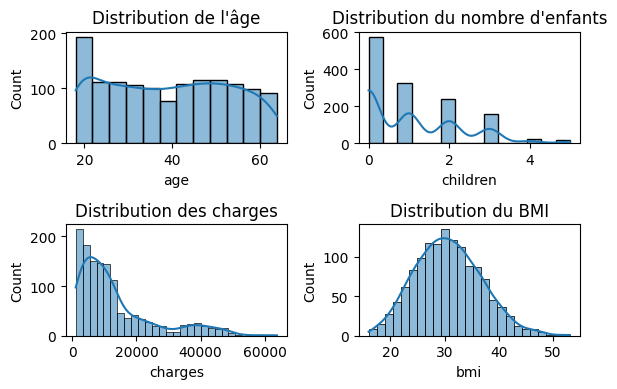

In [655]:
mpl.figure(figsize=(6,4))

mpl.subplot(2,2,1)
sbn.histplot(content['age'], kde=True)
mpl.title("Distribution de l'âge")

mpl.subplot(2,2,2)
sbn.histplot(content['children'], kde=True)
mpl.title("Distribution du nombre d'enfants")

mpl.subplot(2,2,3)
sbn.histplot(content['charges'], kde=True)
mpl.title("Distribution des charges")

mpl.subplot(2,2,4)
sbn.histplot(content['bmi'], kde=True)
mpl.title("Distribution du BMI")

mpl.tight_layout()
mpl.show()

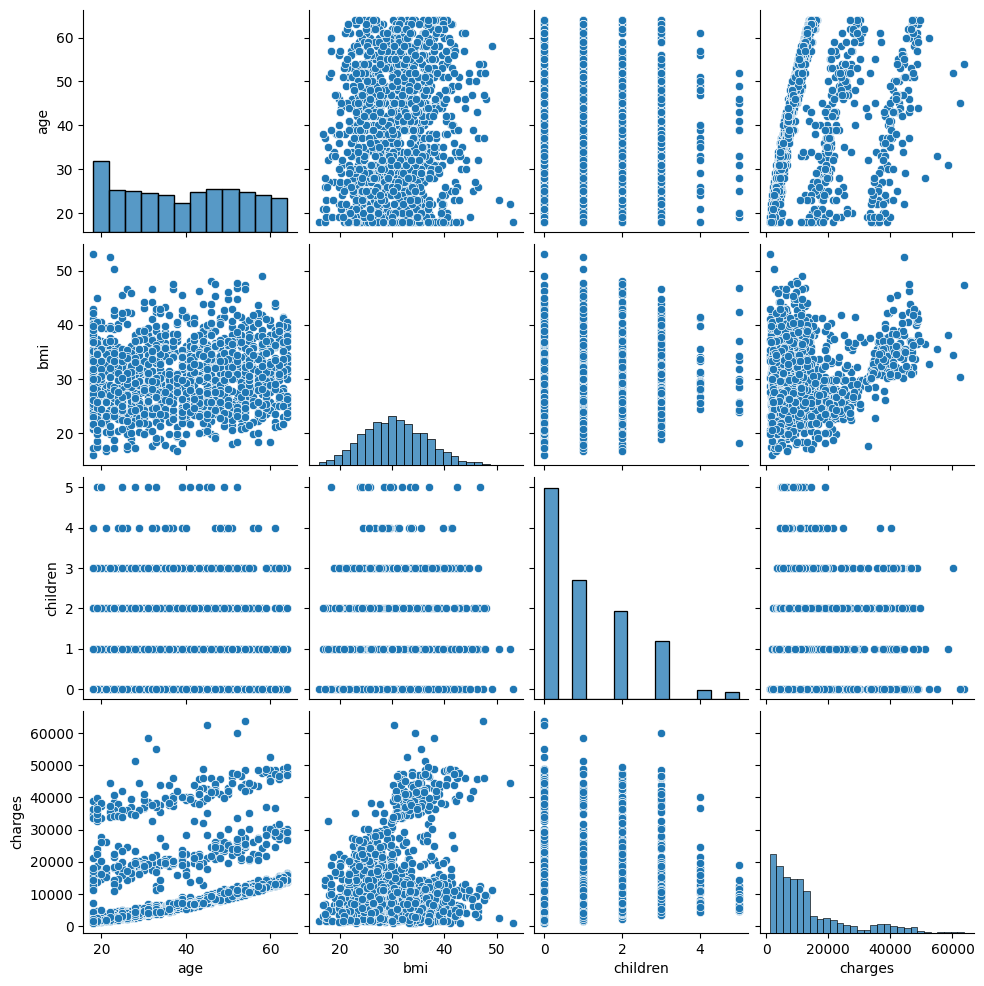

In [656]:
# Pairplot
sbn.pairplot(content[['age', 'bmi', 'children', 'charges']])
mpl.show()

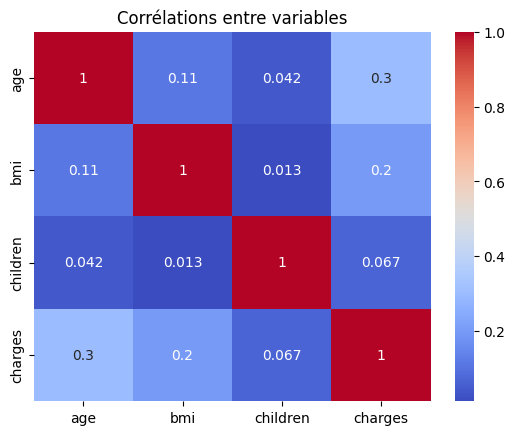

In [657]:
# Heatmap de corrélation
sbn.heatmap(content[['age', 'bmi', 'children', 'charges']].corr(), annot=True, cmap="coolwarm")
mpl.title("Corrélations entre variables")
mpl.show()

## Détection et traitement des valeurs aberrantes

### Identification via boxplot (Seaborn)

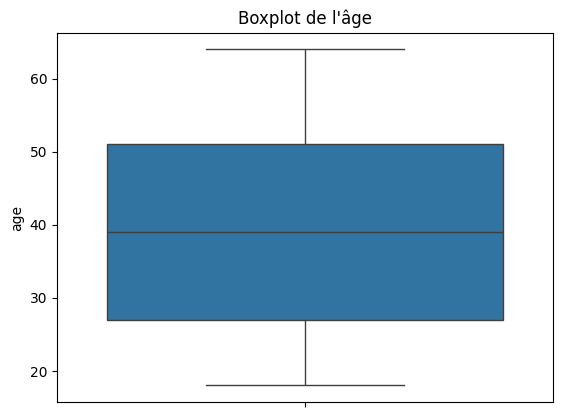

In [484]:
sbn.boxplot(y=content['age'])
mpl.title("Boxplot de l'âge")
mpl.show()

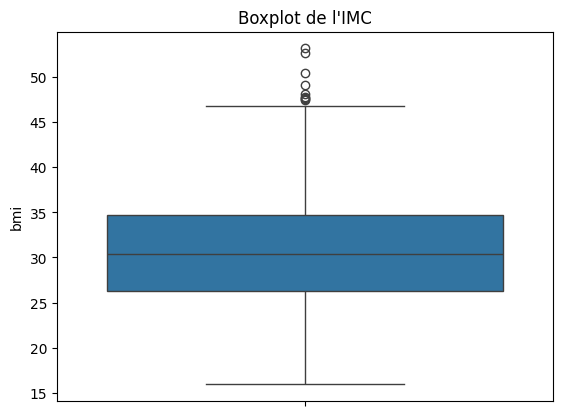

In [658]:
sbn.boxplot(y=content['bmi'])
mpl.title("Boxplot de l'IMC")
mpl.show()

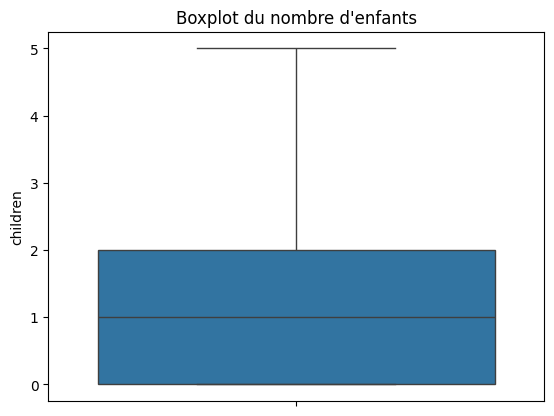

In [659]:
sbn.boxplot(y=content['children'])
mpl.title("Boxplot du nombre d'enfants")
mpl.show()

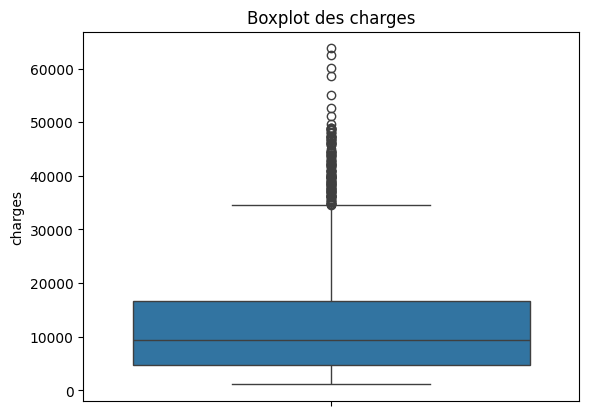

In [660]:
sbn.boxplot(y=content['charges'])
mpl.title("Boxplot des charges")
mpl.show()

### Remarque après analyse des boxplots

Après l'analyse des boxplots, je peux comparer ces résultats avec les graphiques de type **pairplot**.  

J'observe que :  
- Les **valeurs extrêmes** apparaissent sur la **distribution asymétrique** (ex. : `charges`).  
- Mais elles peuvent aussi être présentes sur une **distribution plus symétrique** (ex. : `bmi`).  

Cela montre que les outliers ne sont pas réservés aux distributions asymétriques et qu'il est important de les détecter pour **toutes les variables numériques** avant d'effectuer une analyse ou de construire un modèle de machine learning.


## Identification avec l’IQR et suppression

Données après suppression des outliers :
(1337, 10)


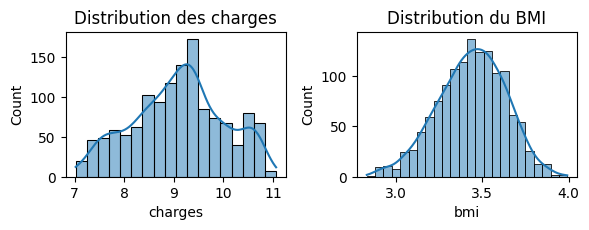

In [661]:
content_numeric = ["charges", "bmi", "age", "children"]
content2 = content.copy()

for col in content_numeric:
    Q1 = content2[col].quantile(0.25)
    Q3 = content2[col].quantile(0.75)
    IQR = Q3-Q1

    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR

    # content2 = content2[(content2[col] >= lower_bound) & (content2[col] <= upper_bound)] 


content2["charges"] = np.log1p(content2["charges"])
content2["bmi"] = np.log1p(content2["bmi"])


    #Après la suppression des valeurs extrêmes, les performances des modèles ont diminué 
    # de manière significative. En particulier, le R² est tombé autour de 0.30 à 0.50, 
    # indiquant que les modèles expliquent désormais moins bien la variance des données. 
    # Le RMSE et le MAE restent relativement élevés pour tous les modèles, ce qui suggère que 
    # l’élimination des outliers a en réalité réduit la qualité de l’apprentissage et que ces 
    # valeurs extrêmes contenaient probablement des informations importantes pour la prédiction.


print("Données après suppression des outliers :")
print(content2.shape)


mpl.figure(figsize=(6,4))




mpl.subplot(2,2,3)
sbn.histplot(content2['charges'], kde=True)
mpl.title("Distribution des charges")

mpl.subplot(2,2,4)
sbn.histplot(content2['bmi'], kde=True)
mpl.title("Distribution du BMI")

mpl.tight_layout()
mpl.show()




## Répartition des données en ensembles d’entraînement (80 %) et de test (20 %)

In [663]:
from sklearn.model_selection import train_test_split 

x = scaler_content.drop('charges',axis=1)
y = scaler_content['charges'] 

x_train , x_test , y_train , y_test = train_test_split(
    x,y,test_size=0.2,random_state=42
)

print("x_train:", x_train.shape)
print("x_test:", x_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

x_train: (1069, 9)
x_test: (268, 9)
y_train: (1069,)
y_test: (268,)


## Normalisation ou standardisation des variables numériques

In [678]:
content_numeric2 = ["age", "children"]

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler_content = content2.copy()
scaler_content[content_numeric2] = scaler.fit_transform(content2[content_numeric2])
print(scaler_content.head())
print(scaler_content.mean())

        age  sex       bmi  children  smoker   charges  region_northeast  \
0 -1.440418    0  3.363842 -0.909234       1  9.734236                 0   
1 -1.511647    1  3.548755 -0.079442       0  7.453882                 0   
2 -0.799350    1  3.526361  1.580143       0  8.400763                 0   
3 -0.443201    1  3.165686 -0.909234       0  9.998137                 0   
4 -0.514431    1  3.397189 -0.909234       0  8.260455                 0   

   region_northwest  region_southeast  region_southwest  
0                 0                 0                 1  
1                 0                 1                 0  
2                 0                 1                 0  
3                 1                 0                 0  
4                 1                 0                 0  
age                -6.643070e-17
sex                 5.048616e-01
bmi                 3.436321e+00
children            3.852980e-17
smoker              2.049364e-01
charges             9.100097e+

## Entraînement des Modèles de Régression

In [664]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR 
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Initialiser les modèles
lin_reg = LinearRegression()
rf_reg = RandomForestRegressor()    
xgb_reg = XGBRegressor()
svr_reg = SVR() 

models = {
    "LinearRegression":lin_reg,
    "RandomForestRegressor":rf_reg,
    "XGBRegressor":xgb_reg,
    "SVR":svr_reg,
}

for name,model in models.items():
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)

    rmse = np.sqrt(mean_squared_error(y_test,y_pred)) #Root Mean Squared Error
    mae = mean_absolute_error(y_test, y_pred) #Mean Absolute Error
    r2 = r2_score(y_test, y_pred) #Coefficient de détermination

    print(f"pour {name :} RMSE: {rmse:.2f} MAE : {mae:.2f} R2 : {r2:.2f}")


#Parmi les modèles testés, le RandomForestRegressor se révèle être le plus performant, 
#avec un RMSE de 4624,18 et un MAE de 2555,85, ce qui indique que ses prédictions sont 
#très proches des valeurs réelles. De plus, son R² de 0,88 montre qu’il explique 88 % 
#de la variance des données, ce qui en fait le modèle le plus précis et fiable pour ce jeu de données


pour LinearRegression RMSE: 0.40 MAE : 0.26 R2 : 0.83
pour RandomForestRegressor RMSE: 0.37 MAE : 0.19 R2 : 0.85
pour XGBRegressor RMSE: 0.43 MAE : 0.23 R2 : 0.80
pour SVR RMSE: 0.34 MAE : 0.18 R2 : 0.87


## Recherche des meilleurs hyperparamètres pour Random Forest avec GridSearchCV et validation croisée 5-folds

In [767]:
from sklearn.model_selection import GridSearchCV  

grid_param = {
    'n_estimators':[50,100,200],
    'max_depth':[None,5,10,20],
    'min_samples_split':[2,5,10]
}

rf_reg = RandomForestRegressor(random_state=42)

grid_search = GridSearchCV(estimator=rf_reg,param_grid=grid_param,cv=5)


grid_search.fit(x_train,y_train)
print(grid_search.best_params_)
print(grid_search.best_score_)

{'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 200}
0.8139419224990396


## Recherche des meilleurs hyperparamètres pour XGBoost avec GridSearchCV et validation croisée 5-folds

In [582]:
grid_param = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 10, 20],
    'subsample': [0.5, 0.7, 1.0]
}

xgb_reg = XGBRegressor(random_state=42)

grid_search = GridSearchCV(estimator=xgb_reg,param_grid=grid_param,cv=5)

grid_search.fit(x_train,y_train)

print(grid_search.best_params_)
print(grid_search.best_score_)

{'learning_rate': 0.1, 'max_depth': 3, 'subsample': 1.0}
0.8381578705673954


## Évaluation et comparaison des performances des modèles avant et après optimisation

In [665]:
## pour RandomForestRegressor :
# best_param = {'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 200}


 
rf_reg = RandomForestRegressor(
    n_estimators=200,
    max_depth=5,
    min_samples_split=2,
    random_state=42)


rf_reg.fit(x_train,y_train)
y_pred = rf_reg.predict(x_test)

rmse = np.sqrt(mean_squared_error(y_test,y_pred))
mae = mean_absolute_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)

print(rmse,mae,r2)

0.33169976476050145 0.17730448264822543 0.8814245429498833


In [771]:
# pour XGBoost
# best_param = {'learning_rate': 0.1, 'max_depth': 3, 'subsample': 1.0}


xgb_reg = XGBRegressor(
    learning_rate=0.1,
    max_depth=3,
    subsample=1.0,
    random_state=42
)

xgb_reg.fit(x_train,y_train)
y_pred = xgb_reg.predict(x_test)

rmse = np.sqrt(mean_squared_error(y_test,y_pred))
mae = mean_absolute_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)

print(rmse,mae,r2)



0.33114716987992526 0.18708024927000444 0.881819295177678


In [744]:
new_person2 = pd.DataFrame({
    "age": [64],
    "sex": [0],          
    "bmi": [25.08],
    "children": [0],
    "smoker": [1],         
    "region_northeast": [0],
    "region_northwest": [0],
    "region_southeast": [1],
    "region_southwest": [0]
})

new_person2["bmi"] = np.log1p(new_person2["bmi"])

feature_scaled = ["age", "children"]
new_person2[feature_scaled] = scaler.transform(new_person2[feature_scaled])

predicted_charge_log = xgb_reg.predict(new_person2)
predicted_charge = np.expm1(predicted_charge_log)

print(f"Prédiction des charges : {predicted_charge[0]:.2f} \n")


Prédiction des charges : 31404.77 



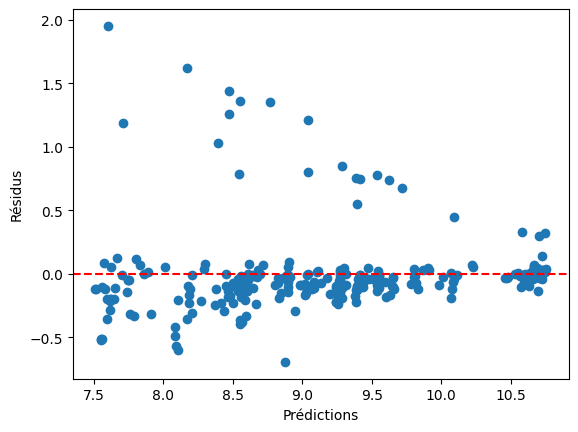

                 min          max
region                           
northeast  1694.7964  58571.07448
northwest  1621.3402  60021.39897
southeast  1121.8739  63770.42801
southwest  1241.5650  52590.82939
region
northeast    13406.384516
northwest    12417.575374
southeast    14735.411438
southwest    12346.937377
Name: charges, dtype: float64


In [ ]:
residus = y_test - y_pred
mpl.scatter(y_pred, residus)
mpl.axhline(0, color='red', linestyle='--')
mpl.xlabel("Prédictions")
mpl.ylabel("Résidus")
mpl.show()




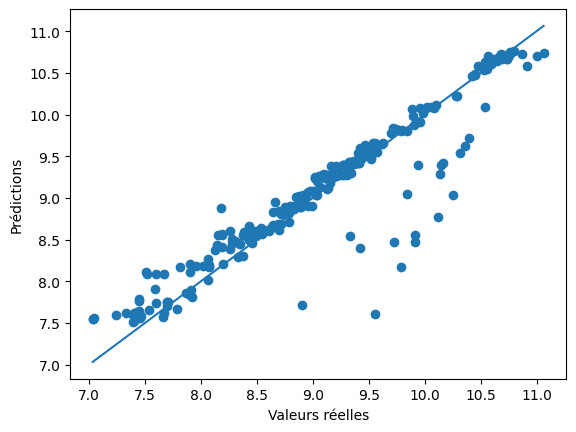

In [ ]:
mpl.scatter(y_test, y_pred)
mpl.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # ligne y=x
mpl.xlabel("Valeurs réelles")
mpl.ylabel("Prédictions")
mpl.show()


In [774]:
lin_reg = LinearRegression()
rf_reg = RandomForestRegressor(n_estimators=200,max_depth=5,min_samples_split=2,random_state=42)   
xgb_reg = XGBRegressor(learning_rate=0.1,max_depth=3,subsample=1.0,random_state=42)
svr_reg = SVR() 

models = {
    "LinearRegression":lin_reg,
    "RandomForestRegressor":rf_reg,
    "XGBRegressor":xgb_reg,
    "SVR":svr_reg,
}

results = [] 

for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results.append([name, rmse, mae, r2])

df_result = pd.DataFrame(results,columns=["Model", "RMSE", "MAE", "R2"])
df_result = df_result.round(2)
print(df_result)

                   Model  RMSE   MAE    R2
0       LinearRegression  0.40  0.26  0.83
1  RandomForestRegressor  0.33  0.18  0.88
2           XGBRegressor  0.33  0.19  0.88
3                    SVR  0.34  0.18  0.87
